<a href="https://colab.research.google.com/github/msa1997/ads-2023/blob/main/ADS_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from Kaggle

### We load the dataset directly from Kaggle.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! echo "{\"username\":\"mohammadaliysz\",\"key\":\"e8f68a5df34c6dc24642db4faf2c79c5\"}" > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset
!unzip heart-attack-analysis-prediction-dataset

heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-attack-analysis-prediction-dataset.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Library

In [ ]:
from IPython.display import clear_output
import pandas as pd
import io
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt
import pylab as pl
import sklearn as sk

%matplotlib inline
sns.set(color_codes=True)

### Import dataset as a data frame

In [ ]:
heart = pd.read_csv('heart.csv')
print(heart.shape)
heart.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# About Dataset

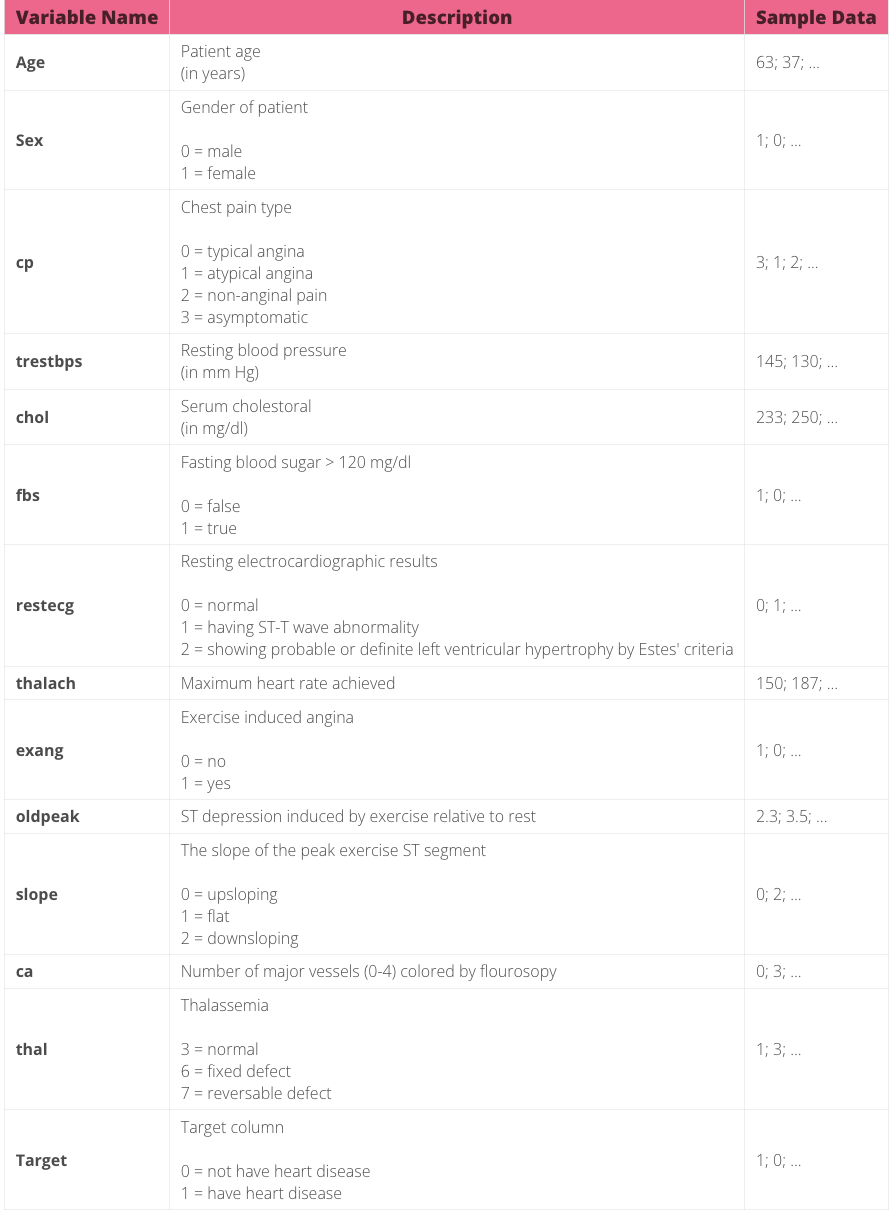

Given this information, we can treat the output column as a binary classification target. For regression, we might predict a continuous variable like oldpeak, thalachh, or chol.

# A quick look at the dataset

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
heart.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# Check for missing values
missing_values = heart.isnull().sum()

missing_values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Fortunately we have no missing values in our dataset.

## We divide features of dataset to some sub-df by their types.

### It helps us to perform both **Linear models** and **classification models** on the dataset.


In [ ]:
categorical_features = heart[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']]

continuous_features = heart[['age', 'trtbps', 'chol', 'thalachh']]
continuous_target = heart[['oldpeak']]


output = heart[['output']]

In [ ]:
continuous_target

,oldpeak
0,2.3
1,3.5
2,1.4
3,0.8
4,0.6
...,...
298,0.2
299,1.2
300,3.4
301,1.2


# Normalization/Standardization of Data

In [ ]:
# First, let's normalize the data
from sklearn.preprocessing import StandardScaler
normalized_continuous_features = StandardScaler().fit_transform(continuous_features)

# Basic Regression & SVM

#### We use continuous_features and **'oldpeak'** as target feature and use linear regression model.

#### It is customary that we must first divide the data into two groups, **Train** and **Test**, so that we can measure the performance of the model for prediction task with the desired metrics.

In [ ]:
# Now let's perform a simple linear regression on the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Define the features and the target for regression
X_reg = normalized_continuous_features
y_reg = continuous_target

# Split the dataset into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train_reg, y_train_reg)

# Predict on the test data
y_pred_reg = regressor.predict(X_test_reg)

#### We calculate the desired metrics for our model(Linear Regression).




In [ ]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_error(y_test_reg, y_pred_reg)/ y_test_reg.mean() * 100  # Mean Absolute Percentage Error
R2 = r2_score(y_test_reg, y_pred_reg)

print('Mean Squared Error (MSE) = %.4f'%mse)
print('Mean Absolute Error (MAE) = %.4f'%mae)
print('Mean Absolute Percentage Error (MAPE) = %.4f'%mape,'%')
print('R2 Score (MAPE) = %.4f'%R2)


Mean Squared Error (MSE) = 1.6044
Mean Absolute Error (MAE) = 0.9961
Mean Absolute Percentage Error (MAPE) = 87.0558 %
R2 Score (MAPE) = 0.1363


These metrics tell us the following:

MSE is quite high, indicating that the model's predictions are quite far from the true values on average.
MAE gives the average absolute difference between predicted and actual values. A value close to 1 suggests that our predictions are off by about 1 unit on average.


MAPE tells us that the predictions are off by an average of
87.06
%
 as a percentage of the actual values. This extremely high percentage indicates that our model may not be very accurate in its predictions, which is also supported by the other metrics.


The R^2 Score is a measure of how well the variance in the dependent variable is explained by the model. An
R
2
  score of
0.1363.
This score is quite low, meaning our model does not do a great job at explaining the variance in the oldpeak variable.

#### Lets visualize actual data and model predicted equivalent data.

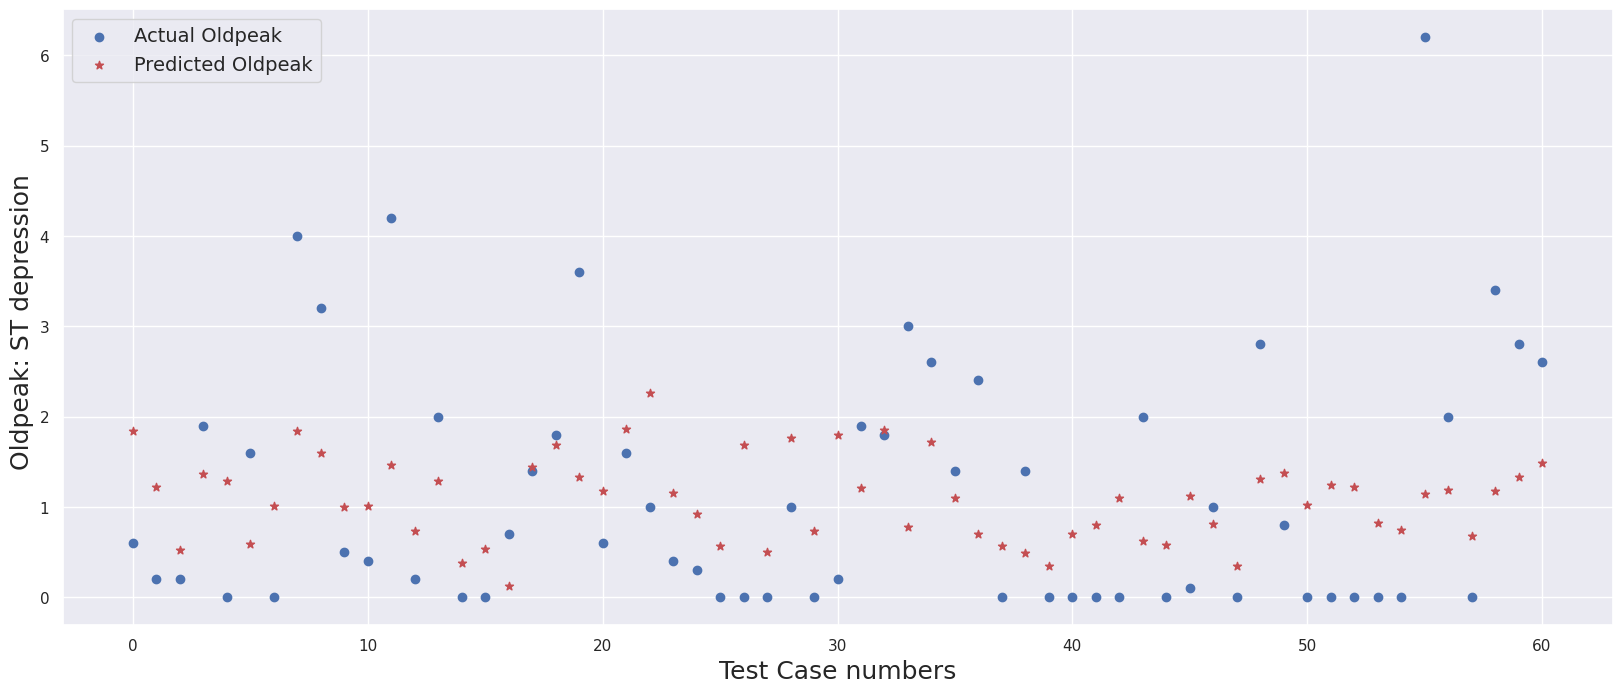

In [ ]:
plt.figure(figsize=(20,8))
x = np.arange(0,len(X_test_reg),1)
plt.scatter(x,y_test_reg,c='b')
plt.scatter(x,y_pred_reg,c='r',marker="*")
plt.legend(['Actual Oldpeak','Predicted Oldpeak'],fontsize=14)
plt.ylabel('Oldpeak: ST depression ',fontsize=18)
plt.xlabel('Test Case numbers',fontsize=18)
plt.show()

With a quick look, you can understand that the model did not work well at all.

###  We will make use of SVM to make our predictions.

In [ ]:
from sklearn.svm import SVR  # Importing the SVR class

# Define the features and the target for regression
X_reg = normalized_continuous_features
y_reg = continuous_target

# Split the dataset into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize the Support Vector Regression (SVR) model
regressor = SVR()

# Fit the model on the training data
regressor.fit(X_train_reg, y_train_reg)

# Predict on the test data
y_pred_reg = regressor.predict(X_test_reg)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### We calculate the desired metrics for our model(SVM).

In [ ]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_error(y_test_reg, y_pred_reg)/ y_test_reg.mean() * 100  # Mean Absolute Percentage Error
R2 = r2_score(y_test_reg, y_pred_reg)

print('Mean Squared Error (MSE) = %.4f'%mse)
print('Mean Absolute Error (MAE) = %.4f'%mae)
print('Mean Absolute Percentage Error (MAPE) = %.4f'%mape,'%')
print('R2 Score (MAPE) = %.4f'%R2)


Mean Squared Error (MSE) = 1.6445
Mean Absolute Error (MAE) = 0.8819
Mean Absolute Percentage Error (MAPE) = 77.0728 %
R2 Score (MAPE) = 0.1147


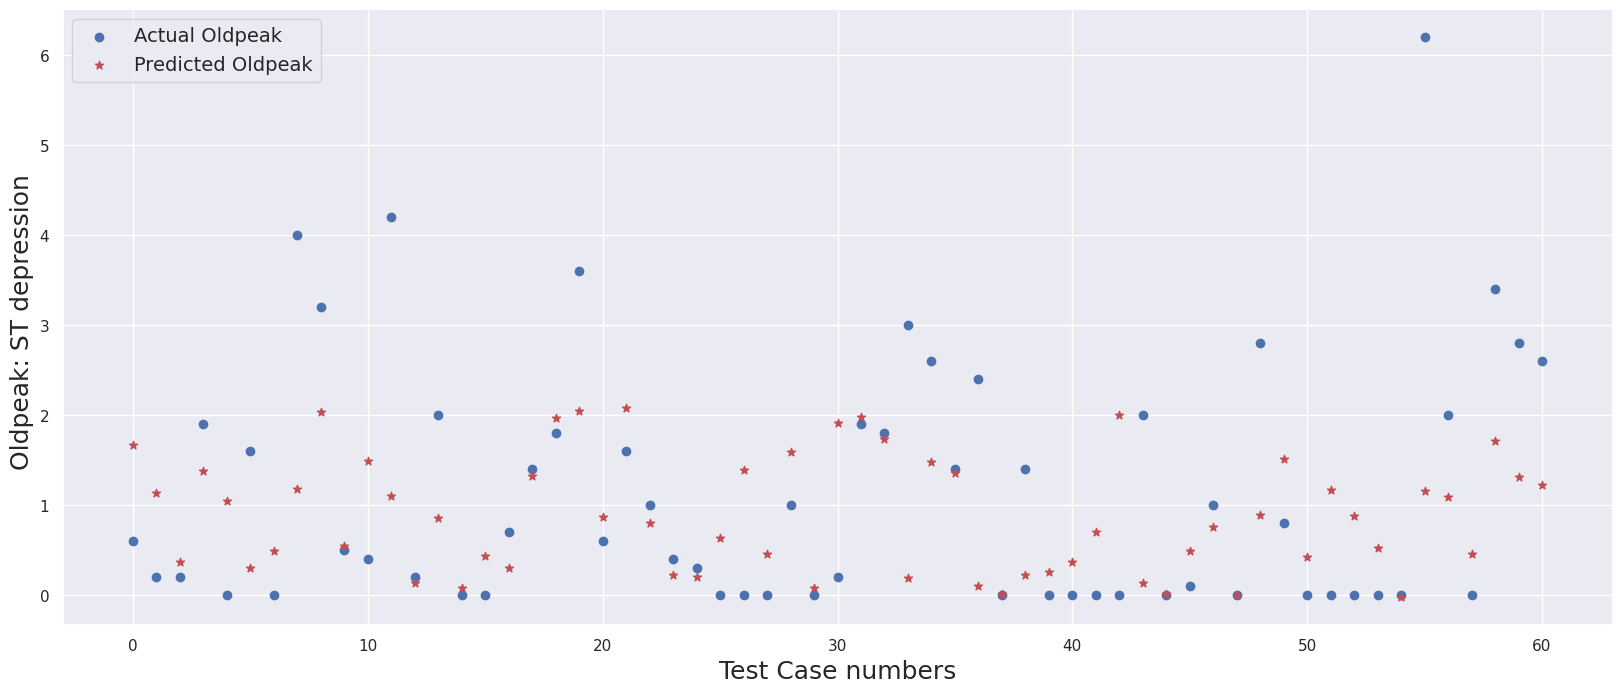

In [ ]:
plt.figure(figsize=(20,8))
x = np.arange(0,len(X_test_reg),1)
plt.scatter(x,y_test_reg,c='b')
plt.scatter(x,y_pred_reg,c='r',marker="*")
plt.legend(['Actual Oldpeak','Predicted Oldpeak'],fontsize=14)
plt.ylabel('Oldpeak: ST depression ',fontsize=18)
plt.xlabel('Test Case numbers',fontsize=18)
plt.show()

### Note that our data is in a relatively high dimension, so linear methods usually don't work as well.

# Binary Classification

### Checking Class Imblance

In [ ]:
output['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

#### We use categorical_features and 'output' as target feature and use **RandomForestClassifier**.
#### It is customary that we must first divide the data into two groups, Train and Test, so that we can measure the performance of the model for prediction task with the desired metrics.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the data into features and target
X = categorical_features
y = output

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Generate predictions
y_pred = clf.predict(X_test)

<ipython-input-75-51222a93f402>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


#### We calculate the desired metrics for our model (RandomForestClassifier).

In [ ]:
# Calculate accuracy metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision =',precision)
print('Recall =',recall)
print('F1-Score =',f1)

Precision = 0.875
Recall = 0.875
F1-Score = 0.875


# Multi Class Classification

### Checking Class Imblance

In [ ]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

#### Now that we are done with binary classification. Lets move to Multi Class classification. This is not the focus of our dataset. So we need to do a bit of tweaking to make it work.

#### Here, to do a multi class classification, we take the values of **chest pain**(0,1,2,3) as our label to be predicted and do a multi class classification on that.

#### We remove the **'cp'** feature so the model can't cheat by looking at them. But we add **output** back in so it can be used to determine the cp level.

In [ ]:
edited = categorical_features.drop(columns = 'cp') #drop the labels that we should predict to prevent the model from cheating
edited = pd.concat([edited,output],axis=1) #adding the output back in
edited_output=categorical_features[['cp']]

#### Now that we have made the data needed for a multi class classification task. Lets train our **RandomForestClassifier** again to fit this new data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features and target
X = edited
y = edited_output

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Generate predictions
y_pred = clf.predict(X_test)

<ipython-input-85-55e9431607d5>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


### Precision

#### Now that we have our classifier, we can start measuring the metrics.

#### We again start with **Precision**. It is the same as above but calculated separtely for each class.

In [ ]:
precision = (precision_score(y_test,y_pred,average=None))
print('precision of class cp0 = ',precision[0],'\n')

print('precision of class cp1 = ',precision[1],'\n')

print('precision of class cp2 = ',precision[2],'\n')

print('precision of class cp3 = ',precision[3],'\n')

precision of class cp0 =  0.7666666666666667 

precision of class cp1 =  0.16666666666666666 

precision of class cp2 =  0.34782608695652173 

precision of class cp3 =  0.0 



We see that the performance is way worse here. Especially for cp level 3 which has 0 percision. It might be because that our features dont correspond well to CP level. Also further feature engineering might be requires.

### Recall

#### Now that we have found the precision. It is time to find the **Recall** as before.
#### It is the same as above but calculated separtely for each class.

In [ ]:
recall = (recall_score(y_test,y_pred,average=None))
print('precision of class cp0 = ',recall[0],'\n')

print('precision of class cp1 = ',recall[1],'\n')

print('precision of class cp2 = ',recall[2],'\n')

print('precision of class cp3 = ',recall[3],'\n')

precision of class cp0 =  0.696969696969697 

precision of class cp1 =  0.1111111111111111 

precision of class cp2 =  0.6153846153846154 

precision of class cp3 =  0.0 



We also see the same trend in Recall values. It might be that values 1 and 3 appear in so few amounts that our model can't generalize at all. Again, this is not the main task of our dataset so we should be fine. But for later use, we can do some feature engineering to see how it goes.



### F1-Score

Finally, it is time to find the F1-score again. looking at precision and recall, it should not be high enough. But we find F1 score using macro(unweighted mean f1 score), micro(global f1 score) and weighted (macro but weighted mean) anyway to see how it goes.

In [ ]:
print('Micro averaged f1 score = %.4f '%f1_score(y_test,y_pred,average='micro'))
print('\n')

print('Macro averaged f1 score =%.4f '%f1_score(y_test,y_pred,average='macro'))
print('\n')

print('Weighted f1 score =%.4f '%f1_score(y_test,y_pred,average='weighted'))
print('\n')

print('Classwise f1 score = ',f1_score(y_test,y_pred,average= None))


Micro averaged f1 score = 0.5246 


Macro averaged f1 score =0.3270 


Weighted f1 score =0.5094 


Classwise f1 score =  [0.73015873 0.13333333 0.44444444 0.        ]


### Confusion Matrix
The confusion matrix illustrates how the algorithm is performing w.r.t. distiguishing the classes from each other. In a glance, we can see how well our alogorithm is doing classfying one class against another.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[23,  2,  2,  3],
       [ 2,  1,  3,  0],
       [ 7,  5,  8,  3],
       [ 1,  1,  0,  0]])

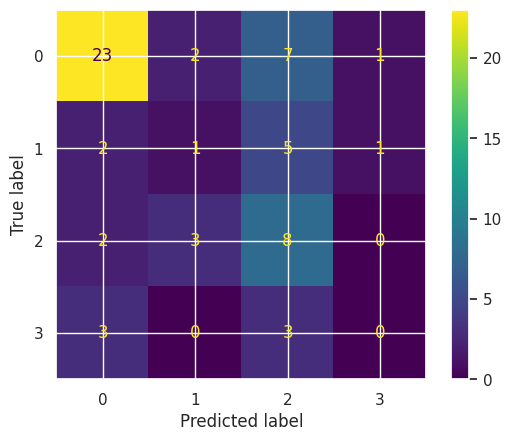

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)#, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#display_labels=classifier.classes_)
disp.plot()

# Conceptual Question

Suppose we have a multi-label classification problem in the field of football, where each sample (player) can belong to some of 4 classes that we have:

Class 1: The player has played for the national team before

Class 2: The player had previous history of heart problems

Class 3: The player had knee injuries before

Class 4: The player has been the captain of the team in the past

What accuracy metric do you use to best capture the accuracy of classification algorithm which predicts the above classes based on some data from each player and why?

In a multi-label classification problem like this where each player can belong to one or more of the four distinct classes, traditional accuracy metrics may not be suitable and we should look for some special metrics. For example the following metrics:




   

*   **Hamming Loss:** This measures the fraction of the wrong labels to the total number of labels.
It is closely related to Hamming Distance between two vectores, and defined as
$\frac{1}{N}\sum_{i=1}^{N} \frac{|Y_i \oplus \hat{Y}_i|}{k} $,
where $\oplus$ is the XOR operation, $ |Y_i \oplus \hat{Y}_i|$ represent the sum of the elements in the vetor $Y_i \oplus \hat{Y}_i$ and $k$ is the length of vectors $Y_i$ and $\hat{Y}_i$, i.e. the number of classes.
Haming loss penalize each individual label mistake equally, but in this case importance of each class is differente.

*   **Subset Accuracy:** This is the strictest metric, indicating the percentage of samples that have all their labels classified correctly. In your case, it would mean a player's data is correctly identified in all four classes. If we want to ensure that all labels are correctly predicted for a sample to count as correct, Subset Accuracy is the right choice.

*   **Jaccard Similarity (Intersection over Union):** This measures the size of the intersection of the predicted labels and the true labels divided by the size of their union. It's a good measure of how similar the predicted and actual labels are.

*   **F1-Score (customized):**
ssign weights to each class. We determine the importance of each class and assign a weight to it. The weight could be based on the class's relevance to the problem, its frequency, or any other criterion that suits your specific needs. This approach allows us to emphasize the importance of certain classes over others in the evaluation metric. For example, it seems predicting heart problems (Class 2) is considered more critical than other classes, so we can assign a higher weight to this class, thereby reflecting its importance in the overall performance metric.


The choice of metric depends on what aspect of the performance is most important for our application.
In many practical applications, a combination of these metrics is used to get a comprehensive understanding of the model's performance.







